In [3]:
from sklearn.datasets import load_iris
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [7]:
import pandas as pd

df = pd.DataFrame(iris.data)
df['target'] = iris.target
df['target_flower'] = df.target.apply(lambda x: iris.target_names[x])
df.head()

,0,1,2,3,target,target_flower
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
        df.drop(['target', 'target_flower'], axis='columns'), 
        df.target, 
        test_size=0.2)

In [24]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

In [26]:
model.score(X_test, y_test)

0.9666666666666667

In [27]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 9,  0,  0],
       [ 0, 11,  1],
       [ 0,  0,  9]], dtype=int64)

Text(33.0, 0.5, 'True')

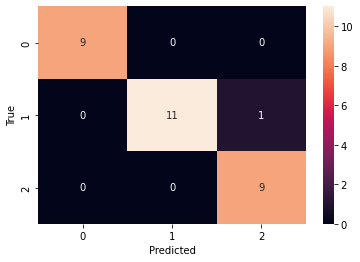

In [29]:
import matplotlib.pyplot as plt
import seaborn as sb

sb.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')